<a href="https://colab.research.google.com/github/NileshCT/Linear_Regression_Modelling/blob/main/LR_L1_L2_algorithm_Boston_House_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Boston Housing Dataset**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

**CRIM**- per capita crime rate by town

**ZN**- proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS**- proportion of non-retail business acres per town.

**CHAS**- Charles River dummy variable (1 if tract bounds river; 0 otherwise)

**NOX**- nitric oxides concentration (parts per 10 million)

**RM**- average number of rooms per dwelling

**AGE** - proportion of owner-occupied units built prior to 1940

**DIS** - weighted distances to five Boston employment centres

**RAD** index of accessibility to radial highways

**TAX**- full-value property-tax rate per $10,000

**PTRATIO** - pupil-teacher ratio by town

**B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT**- % lower status of the population

**MEDV**- Median value of owner-occupied homes in $1000's

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import seaborn as sns


In [2]:
#Installing independances.
! pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Importing independances to import the boston housing dataset.
import pandas as pd
#import boston data from sklearn
from sklearn.datasets import load_boston

#pandas daraframe
boston_dataset = load_boston()
type(boston_dataset)
boston_df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [5]:
#Giving new name to boston_df dataframe.
df=boston_df.copy()

In [6]:
#Exploring top five records.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#Exploring last five records.
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [8]:
#Exploring non null values from dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
#Exploring the datatypes of each feature,
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [10]:
#Exploring the stats information of all numeric feature.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
#Counting all null values from dataframe.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

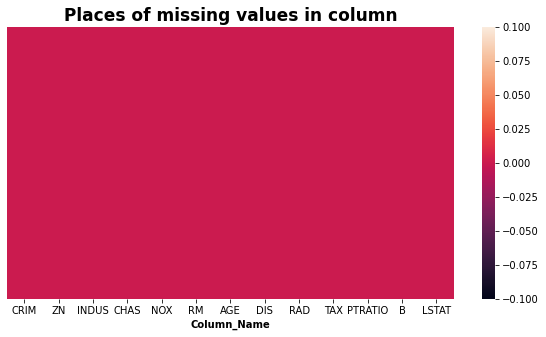

In [14]:
#Visualling the heatmap for all missing values.
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=10, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

**Distribution of Data**

In [15]:
#Lets explore all the feature name. 
numeric_features = df.describe().columns
numeric_features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

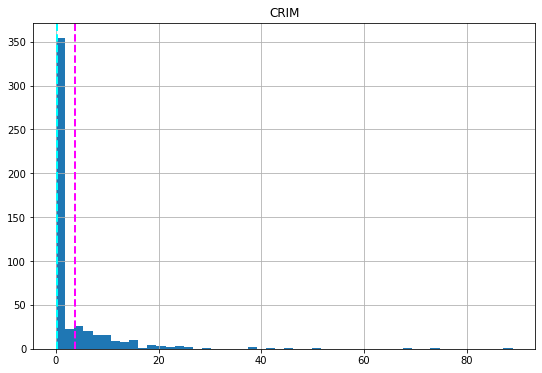

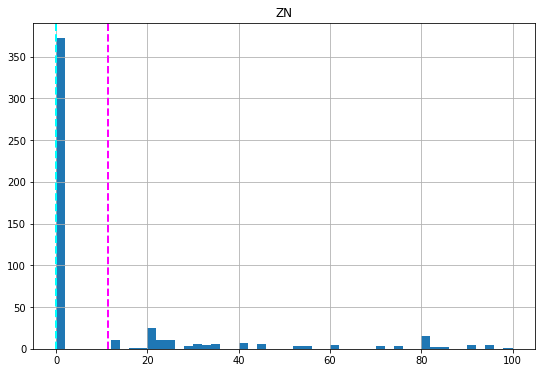

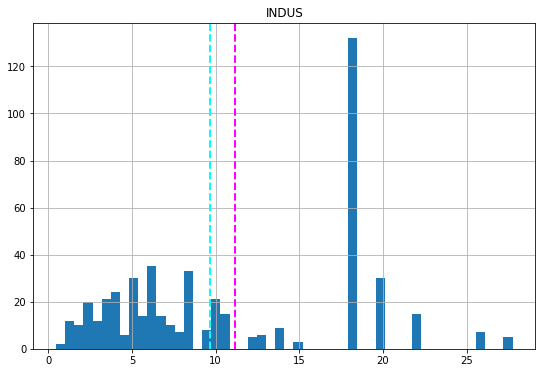

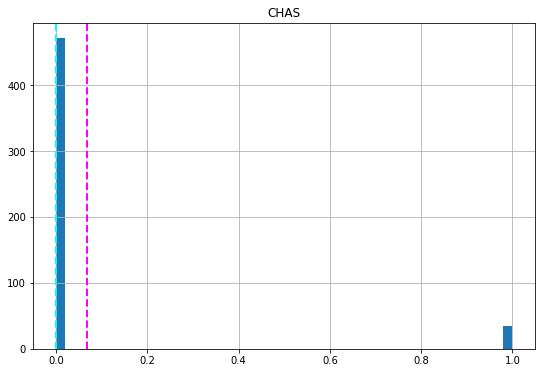

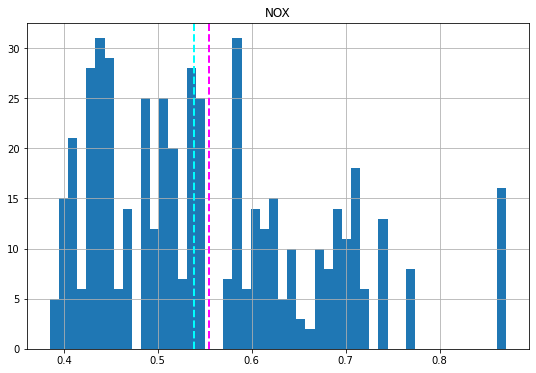

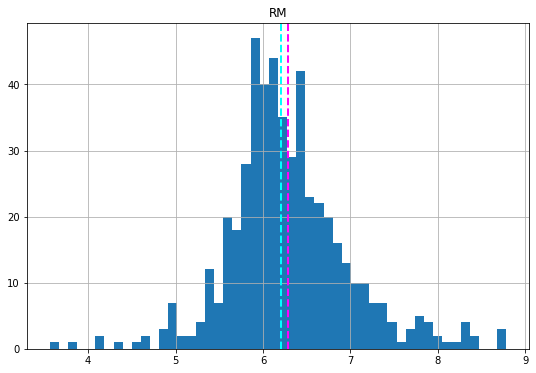

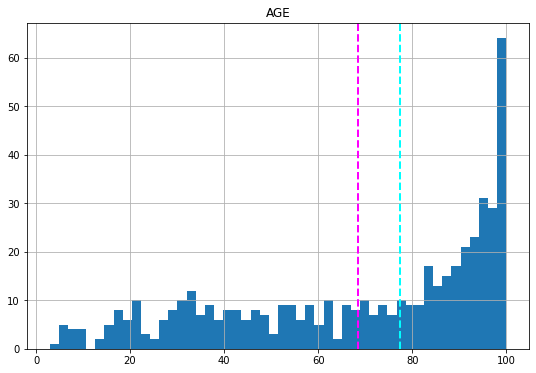

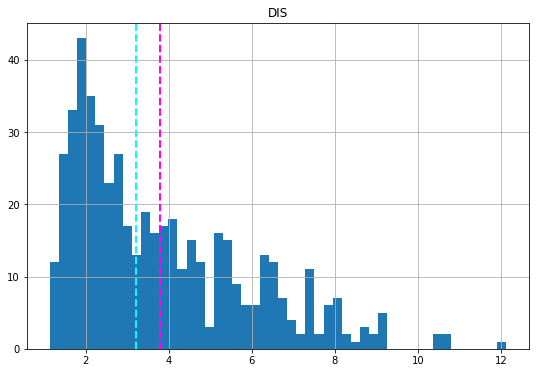

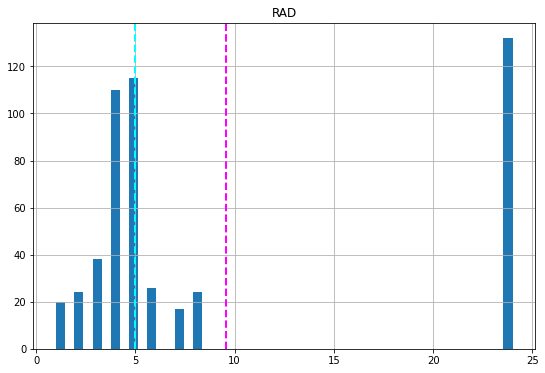

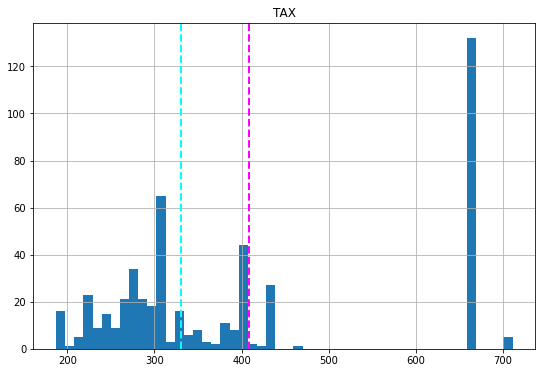

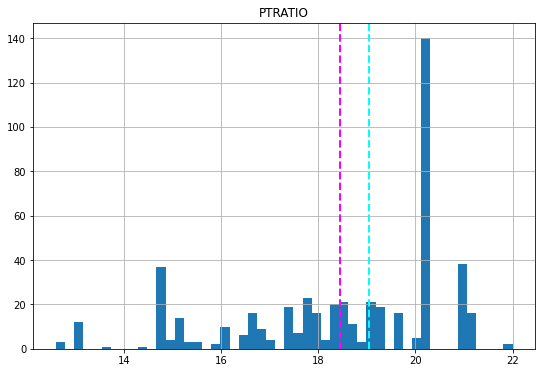

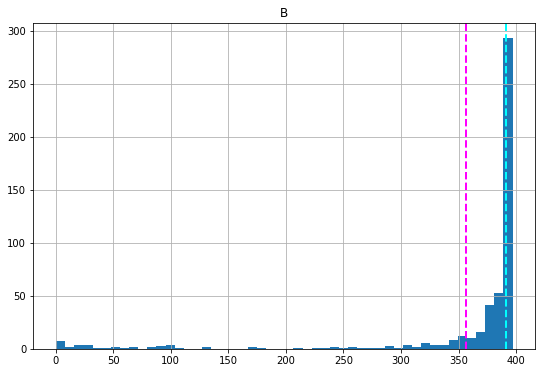

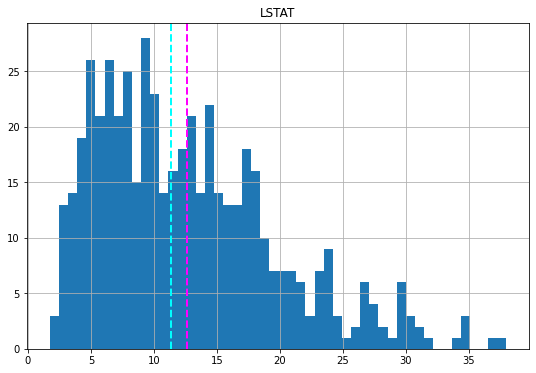

In [16]:
# plot a bar plot for each numerical feature count

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [17]:
df.rename(columns = {'House Price':'House_Price'}, inplace = True)

In [18]:
df.shape

(506, 13)

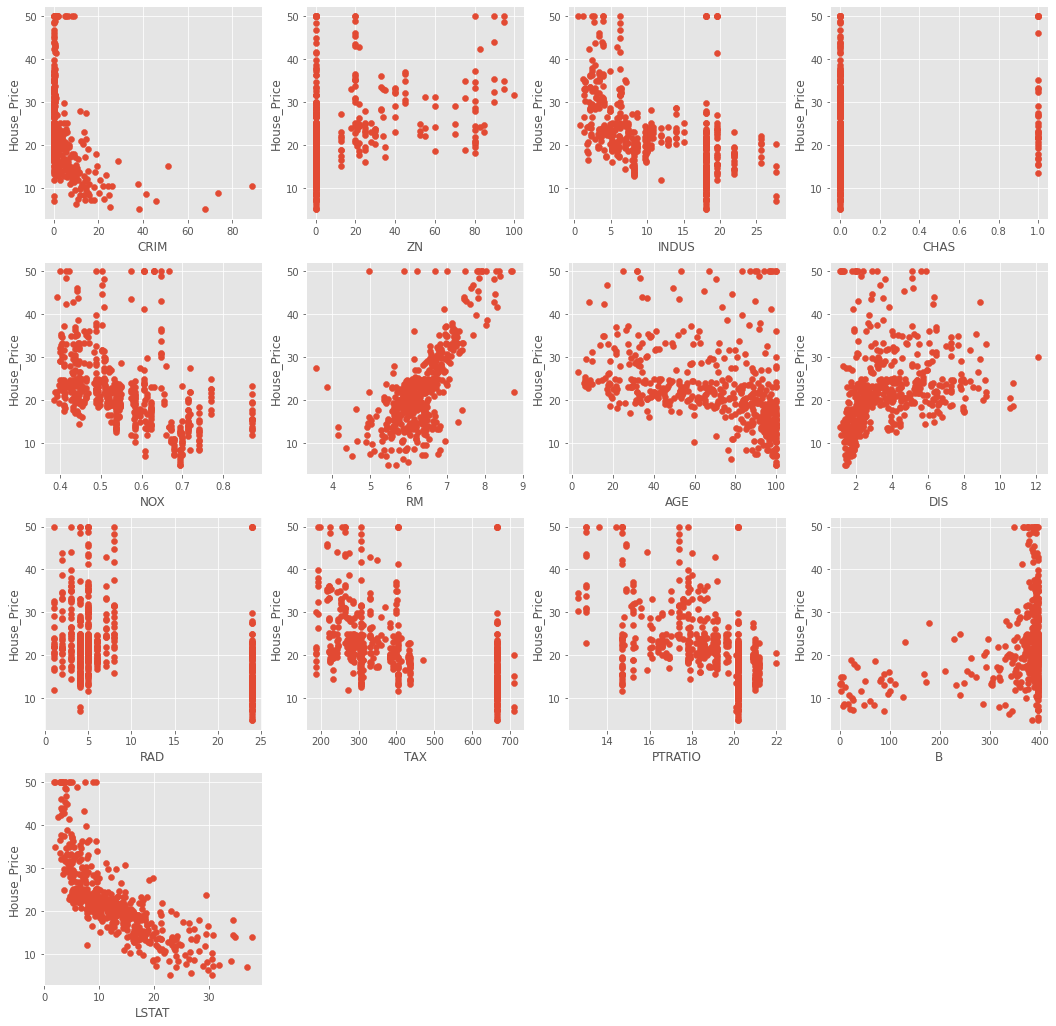

In [19]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(boston_dataset.feature_names):
	ax = fig.add_subplot(4, 4, index + 1)
	ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
	ax.set_ylabel('House_Price', size = 12)
	ax.set_xlabel(feature_name, size = 12)

plt.show()

In [20]:
# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House_Price'] = pd.Series(boston_pd_target)

# input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House_Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [21]:
df=boston_pd.copy()

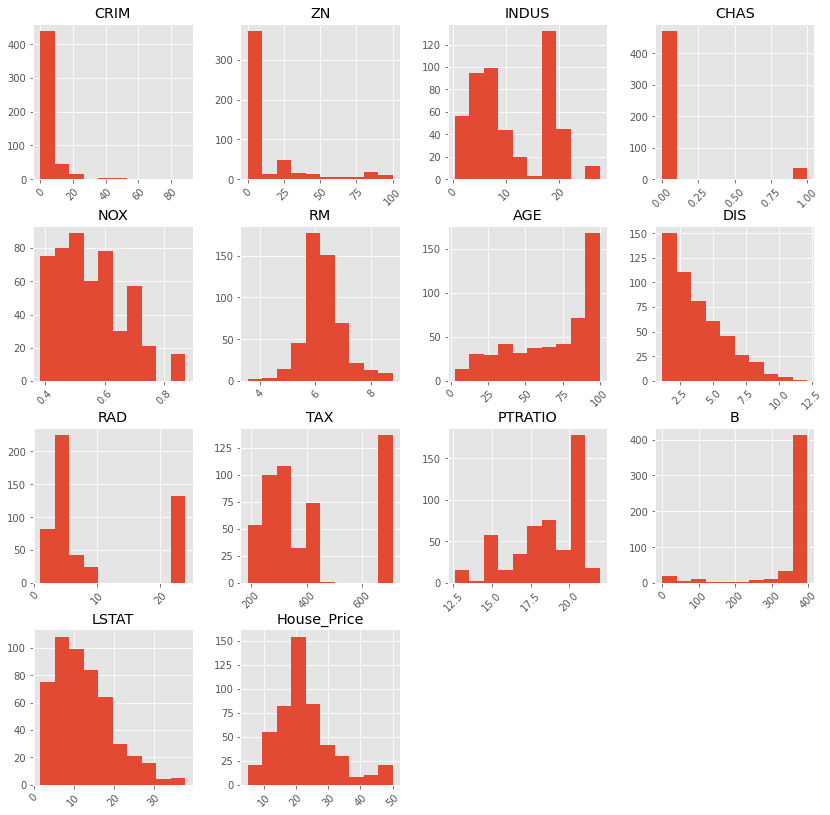

In [22]:
#Exploring histgram to explore the skewness in data.
df.hist(figsize=(14,14), xrot=45)
plt.show()

<ipython-input-23-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


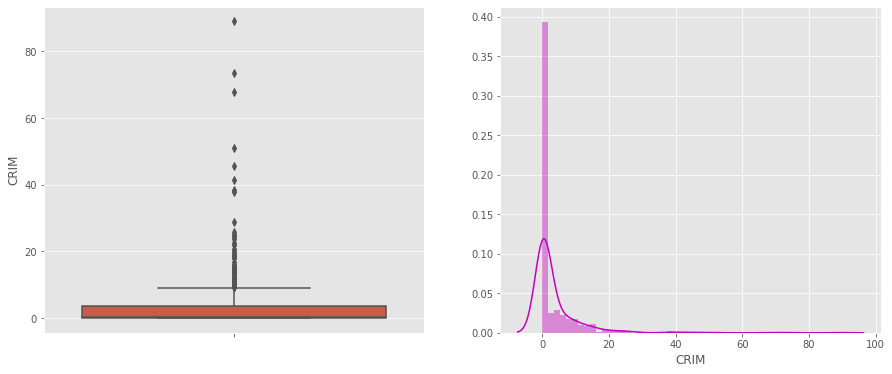

<ipython-input-23-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


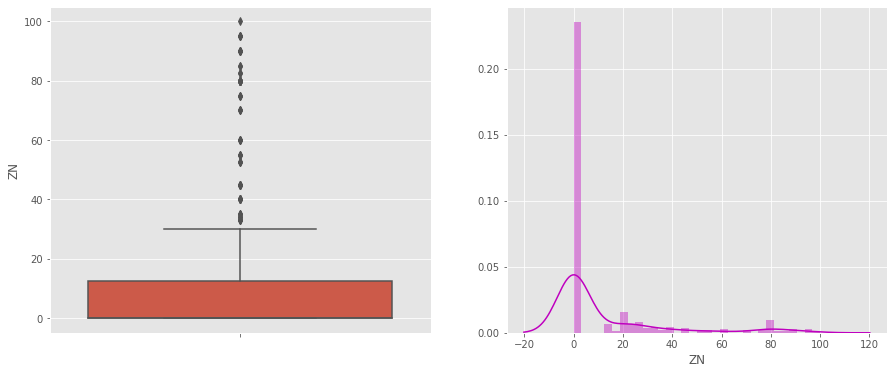

<ipython-input-23-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


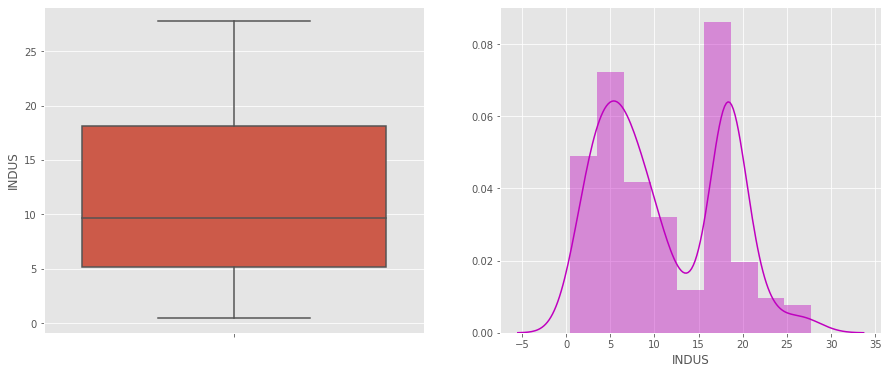

<ipython-input-23-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


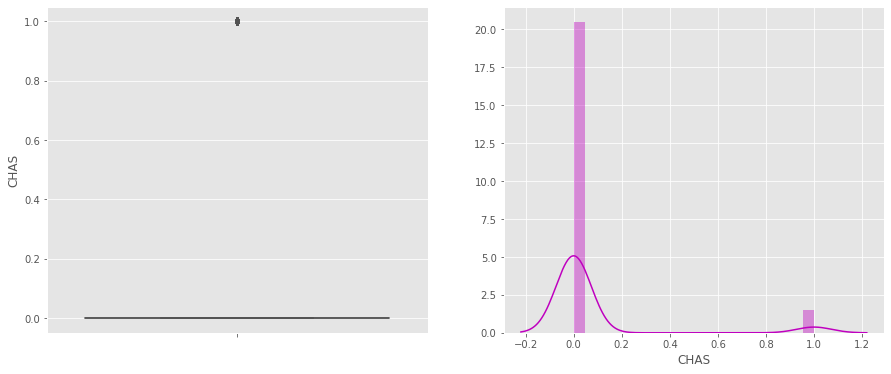

<ipython-input-23-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


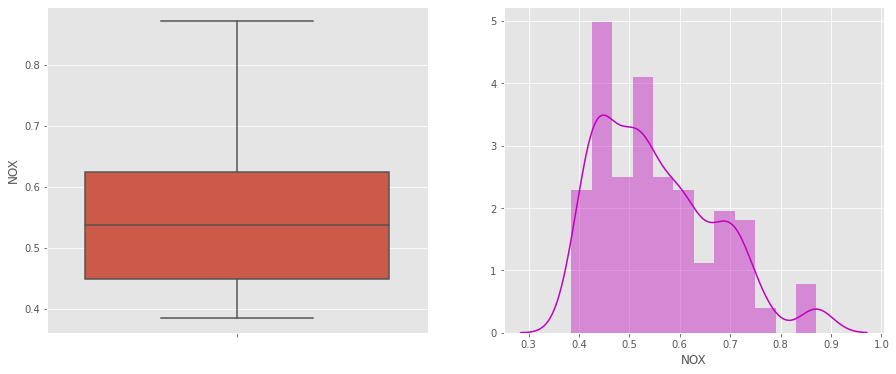

<ipython-input-23-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


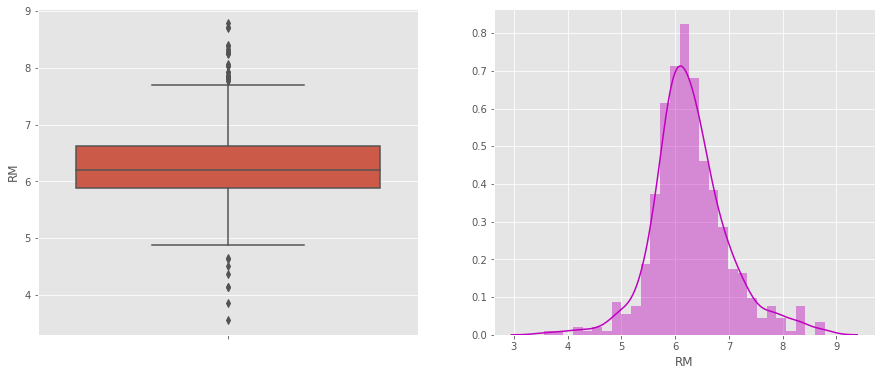

<ipython-input-23-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


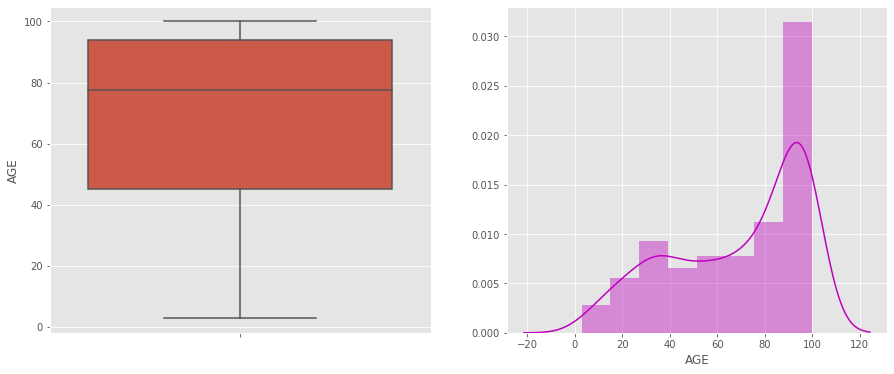

<ipython-input-23-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


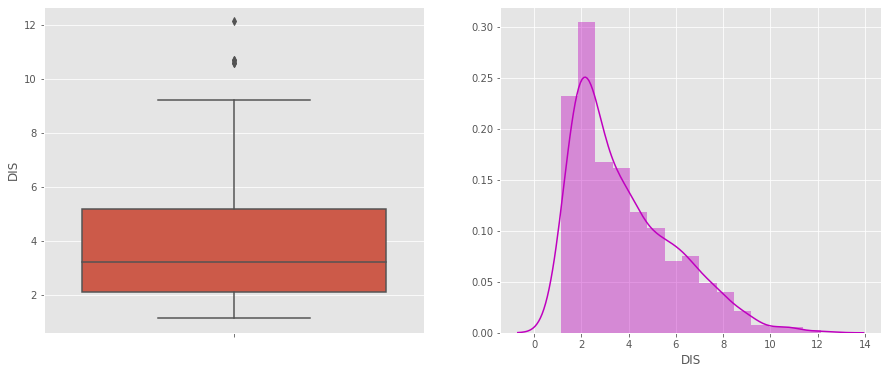

<ipython-input-23-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


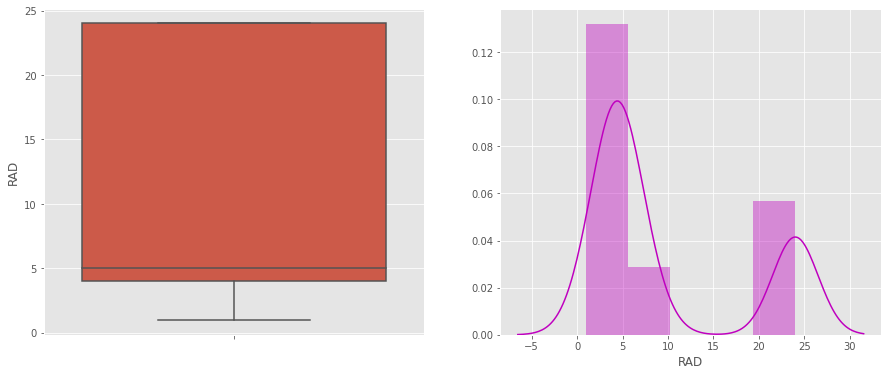

<ipython-input-23-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


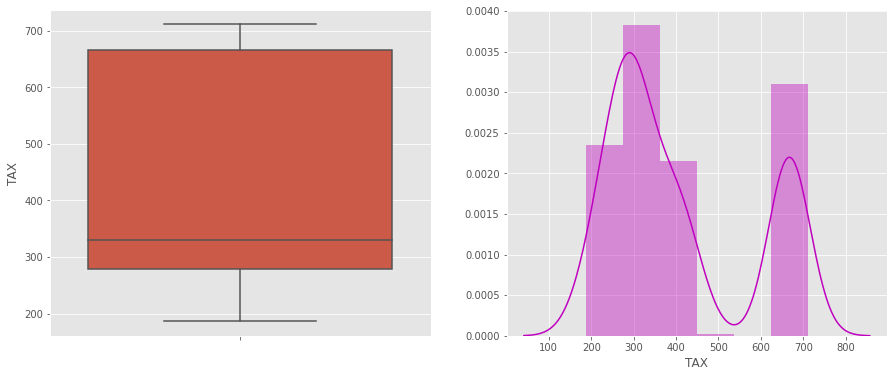

<ipython-input-23-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


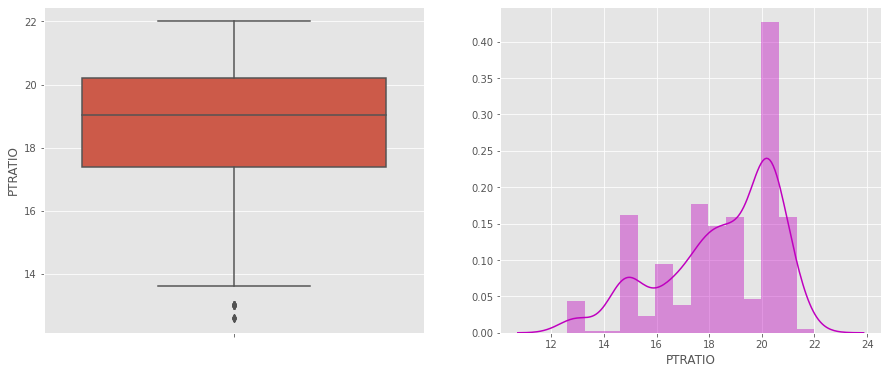

<ipython-input-23-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


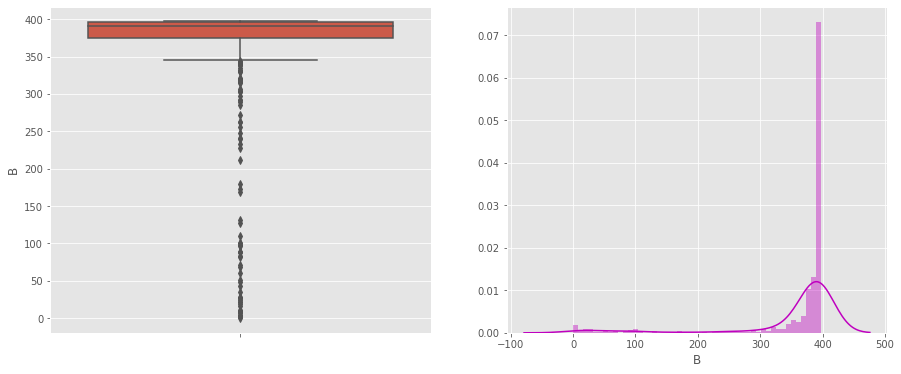

<ipython-input-23-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


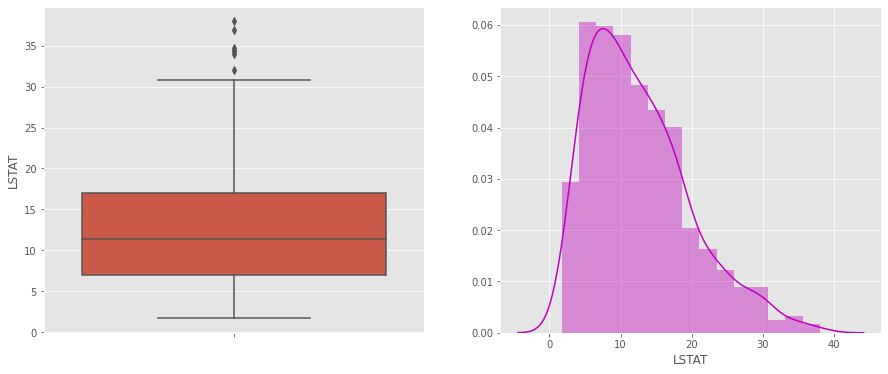

<ipython-input-23-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


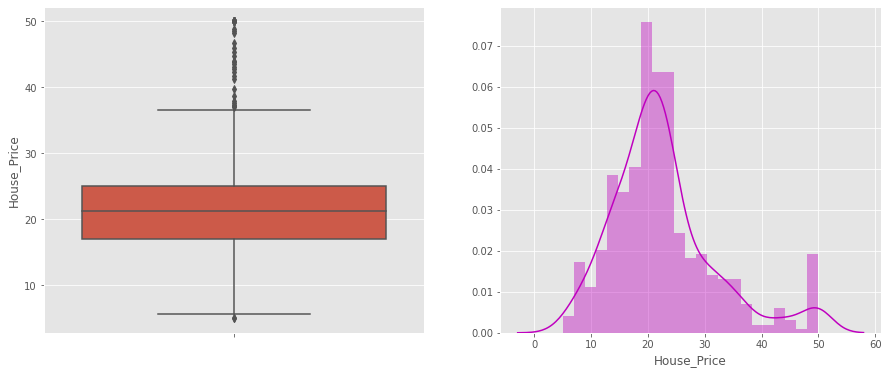

In [23]:
#Box plot with distplot 
numeric_features =df.describe().columns
numeric_features

for var in numeric_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna(),color="m")
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()
     

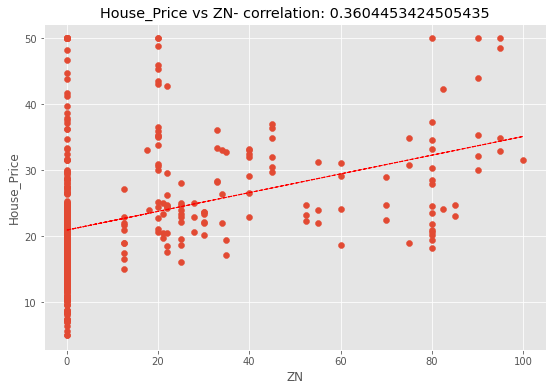

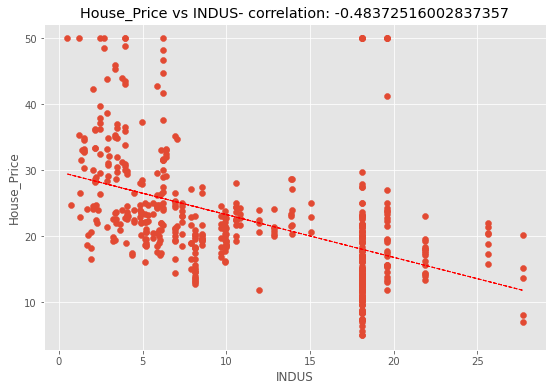

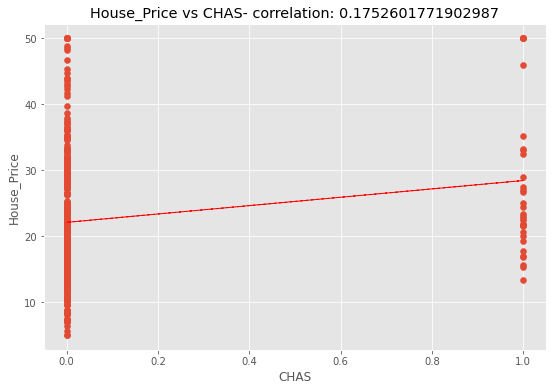

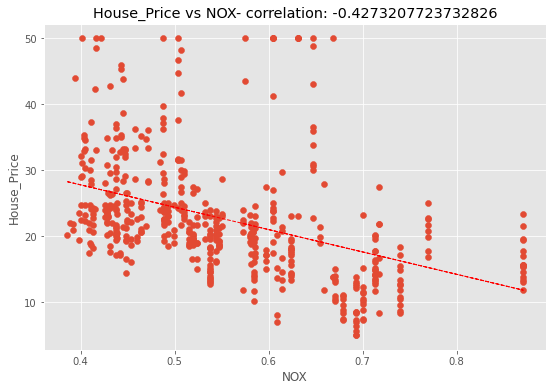

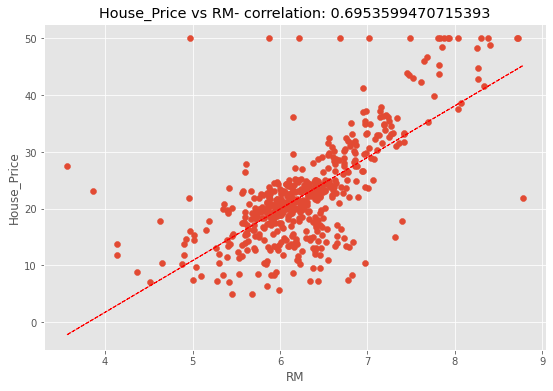

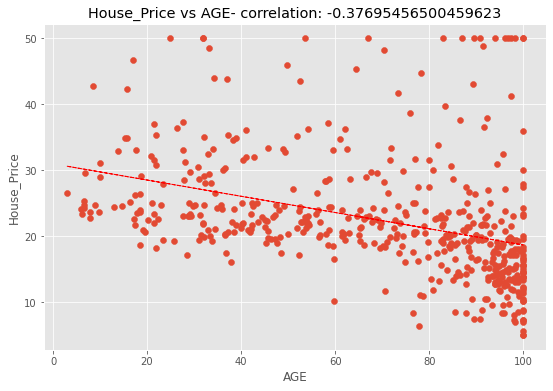

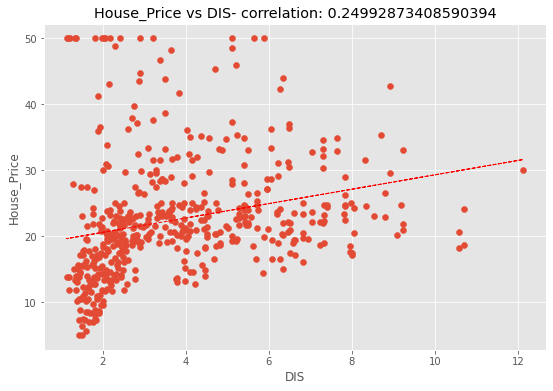

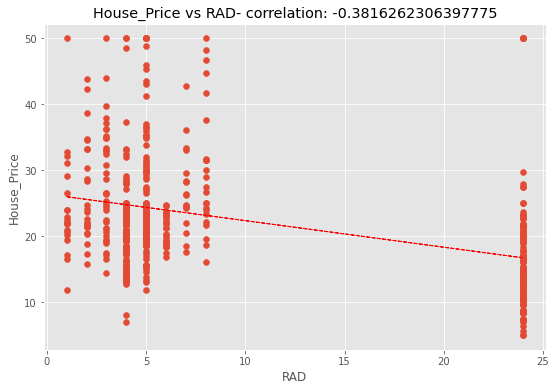

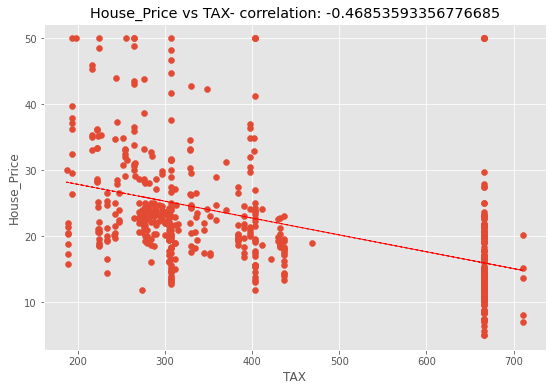

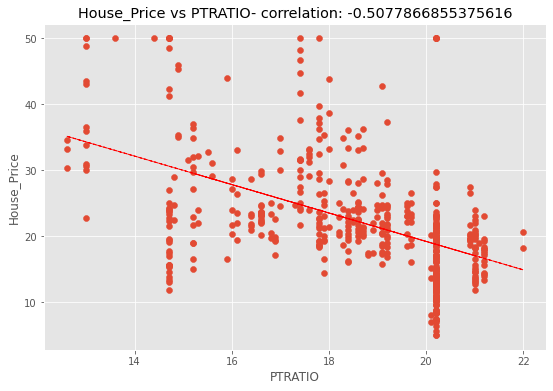

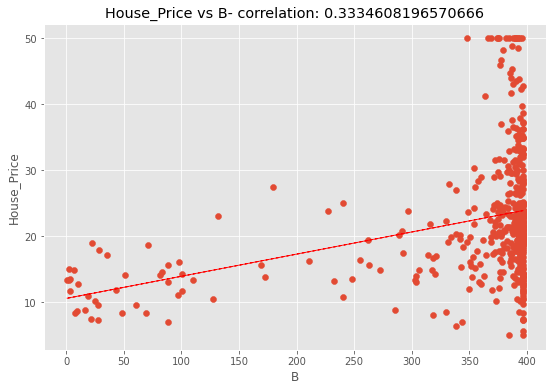

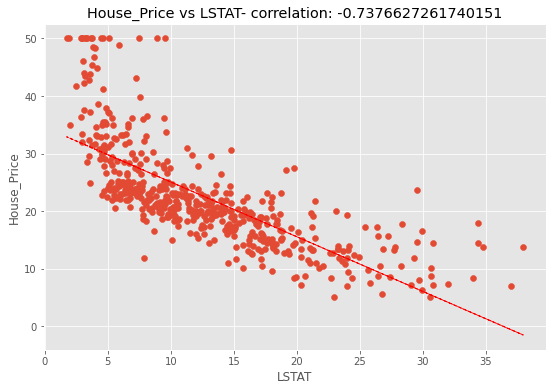

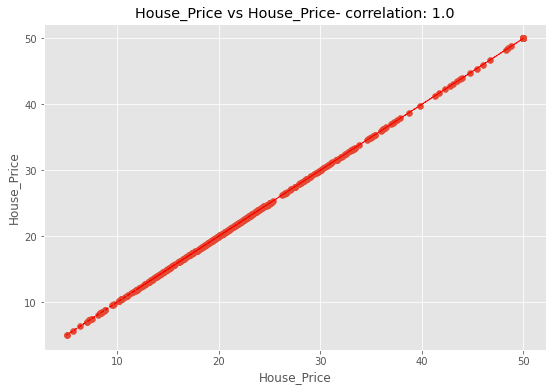

In [24]:
# Co relation plot with the response
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['House_Price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('House_Price')
    ax.set_title('House_Price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['House_Price'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

**Distribution plot of different variables**

<ipython-input-25-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-25-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


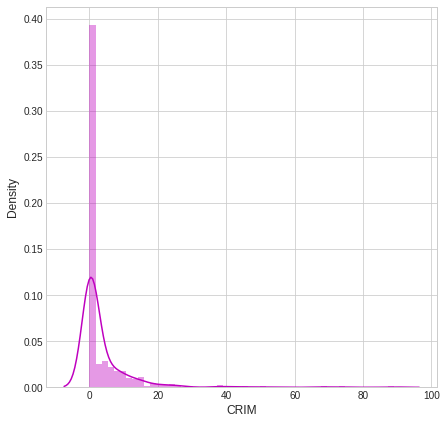

<ipython-input-25-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-25-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


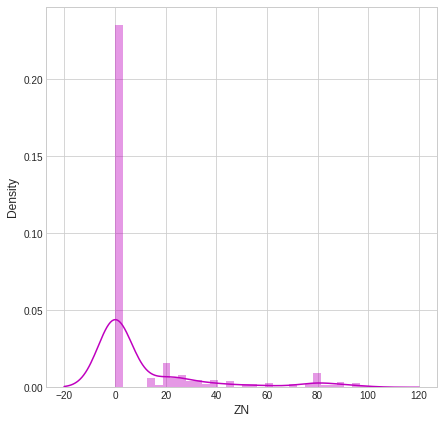

<ipython-input-25-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-25-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


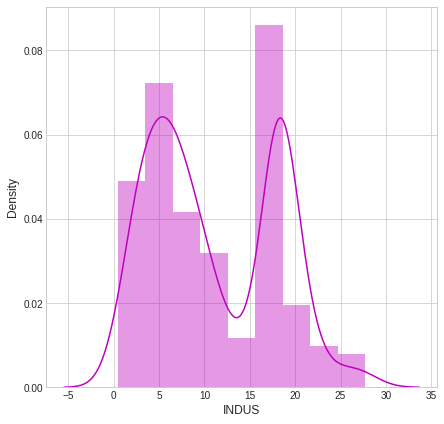

<ipython-input-25-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-25-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


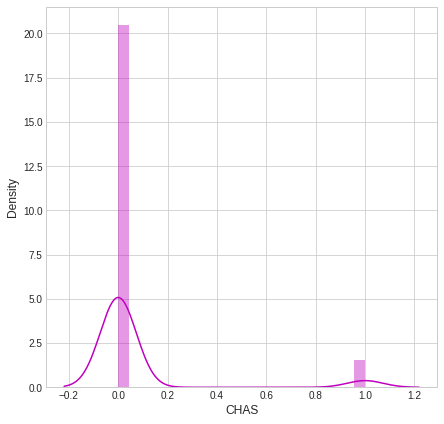

<ipython-input-25-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-25-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


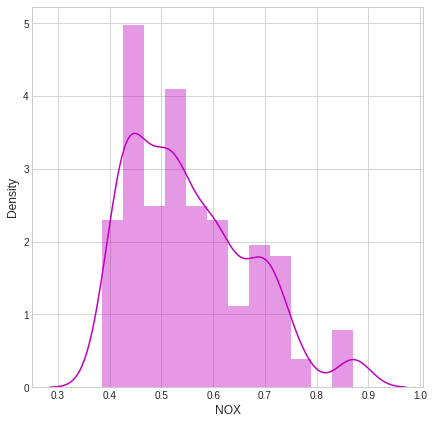

<ipython-input-25-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-25-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


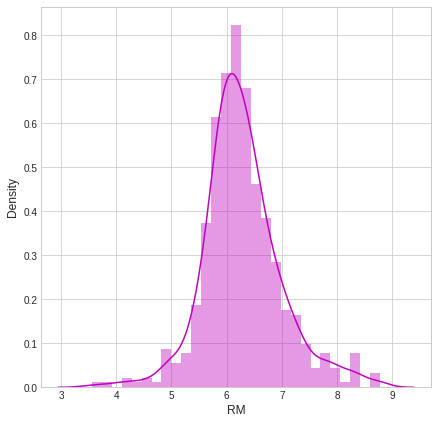

<ipython-input-25-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-25-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


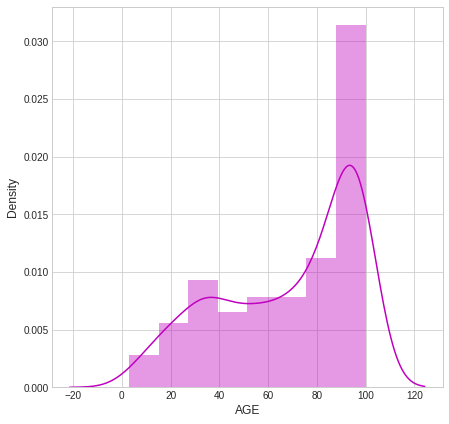

<ipython-input-25-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-25-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


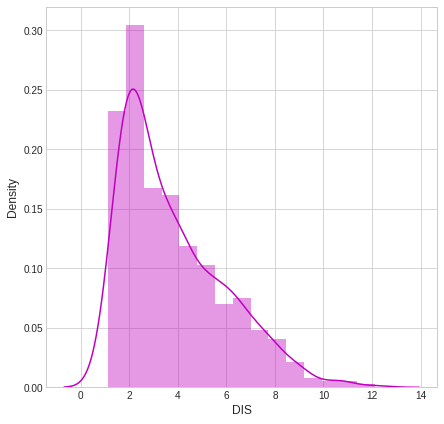

<ipython-input-25-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-25-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


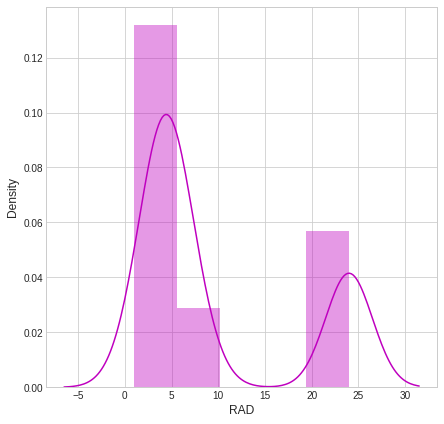

<ipython-input-25-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-25-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


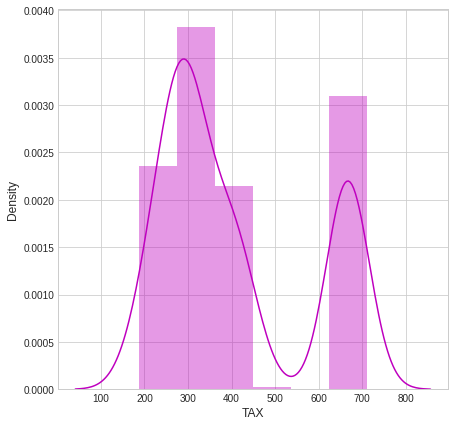

<ipython-input-25-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-25-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


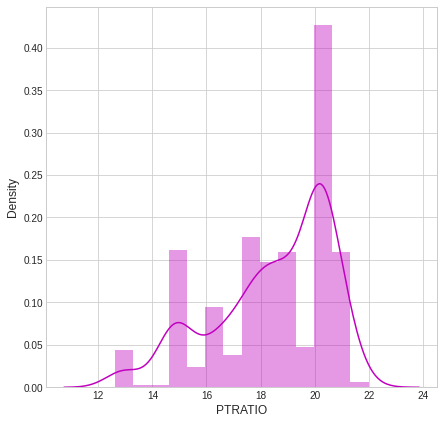

<ipython-input-25-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-25-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


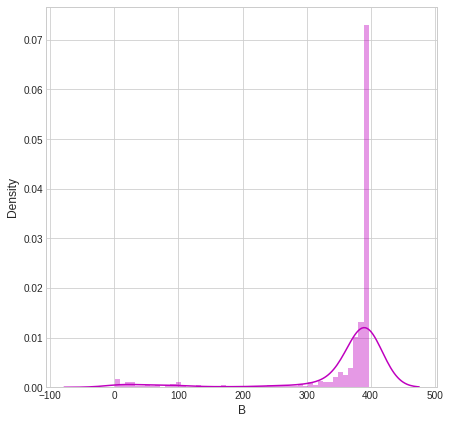

<ipython-input-25-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-25-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


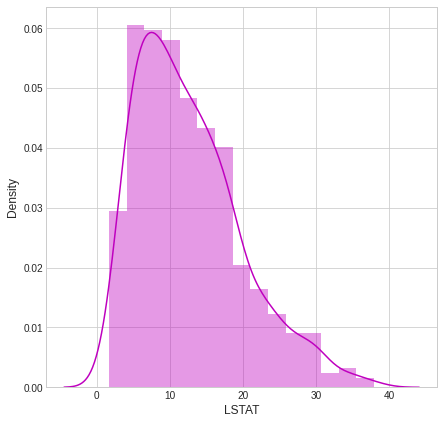

<ipython-input-25-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-25-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


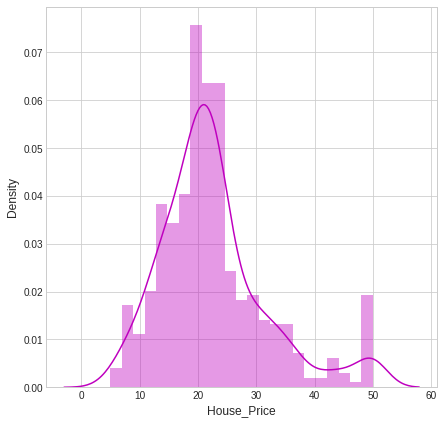

In [25]:
#distplot for numerical features
for val in numeric_features:
  plt.figure(figsize=(7,7))
  plt.style.use('seaborn-whitegrid')
  sns.distplot(df[val],color="m")
  plt.show()

<Axes: >

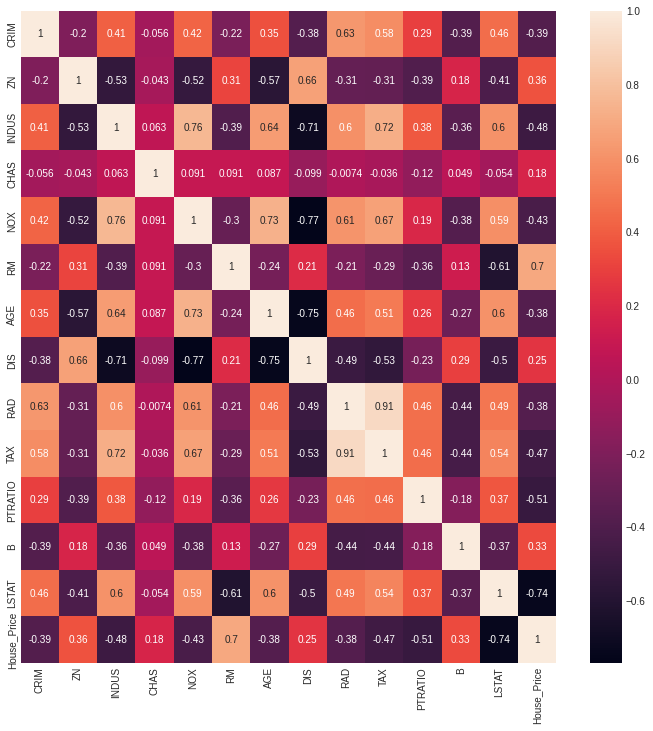

In [26]:
#Heatmap with all corr values to check the relation of dependant and independant variable.
plt.figure(figsize=(12,12))
corr=df.corr()
sns.heatmap(corr,annot=True)
     

In [27]:
df4=df.copy()

In [28]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df4[[i for i in df4.describe().columns if i not in ['House_Price']]])

,variables,VIF
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


In [29]:
df5=df4.copy()

In [30]:
df5.drop(["RM"],axis=1,inplace=True)

In [31]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df5[[i for i in df5.describe().columns if i not in ['House_Price']]])

,variables,VIF
0,CRIM,2.098783
1,ZN,2.673723
2,INDUS,13.978348
3,CHAS,1.147038
4,NOX,55.588774
5,AGE,20.450687
6,DIS,14.220507
7,RAD,15.103835
8,TAX,61.225901
9,PTRATIO,66.103989


In [32]:
df6=df5.copy()

In [33]:
df6.drop(["TAX"],axis=1,inplace=True)

In [34]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df6[[i for i in df6.describe().columns if i not in ['House_Price']]])

,variables,VIF
0,CRIM,2.098737
1,ZN,2.525435
2,INDUS,11.247007
3,CHAS,1.130809
4,NOX,53.610164
5,AGE,20.440418
6,DIS,14.160842
7,RAD,5.542777
8,PTRATIO,63.361770
9,B,19.643028


In [35]:
df7=df6.copy()

In [36]:
df7.drop(["B"],axis=1,inplace=True)

In [37]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df7[[i for i in df7.describe().columns if i not in ['House_Price']]])

,variables,VIF
0,CRIM,2.077582
1,ZN,2.515796
2,INDUS,11.157792
3,CHAS,1.124683
4,NOX,51.116675
5,AGE,20.324149
6,DIS,13.947018
7,RAD,5.071250
8,PTRATIO,53.013989
9,LSTAT,8.299531


In [38]:
df8=df7.copy()

In [39]:
df8.drop(["AGE"],axis=1,inplace=True)

In [40]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df8[[i for i in df8.describe().columns if i not in ['House_Price']]])

,variables,VIF
0,CRIM,2.077549
1,ZN,2.504062
2,INDUS,11.144465
3,CHAS,1.119328
4,NOX,39.669193
5,DIS,12.582568
6,RAD,5.007094
7,PTRATIO,50.637567
8,LSTAT,7.727602


In [69]:
df9=df8.copy()

In [70]:
df9.drop(["PTRATIO"],axis=1,inplace=True)

In [71]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df9[[i for i in df9.describe().columns if i not in ['House_Price']]])

,variables,VIF
0,CRIM,2.075851
1,ZN,2.318040
2,INDUS,9.148216
3,CHAS,1.105417
4,NOX,8.852470
5,DIS,3.154919
6,RAD,4.473518
7,LSTAT,6.043430


In [72]:
#here appling min max scaling on dataframe.
#applying min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df9[['CRIM','ZN','INDUS','CHAS','NOX','DIS','RAD','LSTAT']] = scaler.fit_transform(df8[['CRIM','ZN','INDUS','CHAS','NOX','DIS','RAD','LSTAT']])
df9.head()

,CRIM,ZN,INDUS,CHAS,NOX,DIS,RAD,LSTAT,House_Price
0,0.000000,0.18,0.067815,0.0,0.314815,0.269203,0.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.348962,0.043478,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.348962,0.043478,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.448545,0.086957,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.448545,0.086957,0.099338,36.2


In [73]:
#Train-Test split and training of model with training data.
X = df9.drop(["House_Price"],axis=1)
y = df9.House_Price
     

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_train = regr.predict(X_train)
y_pred_train 

array([31.61546902, 21.94323622, 23.04205022, 20.51166944,  8.74201504,
       20.69743438, 27.32056786, 26.99026652, 29.21616601, 11.89993679,
       14.29780681, 22.46298299,  5.35286977, 23.85562272,  3.25252074,
       22.34925648, 10.59144623, 42.12015282, 30.00417914, 12.35427616,
       16.02027012, 24.35420615, 25.59389063, 17.2290476 , 34.36687784,
       12.88761803, 22.74395174, 35.15454085, 17.91654518, 10.64155733,
       16.2808313 , 20.17397457, 12.74086713, 30.74705596, 24.92650806,
       14.32366203, 22.71944272,  7.23512959, 11.95435571, 23.86799091,
       32.64512719, 25.82572312, 25.82007554, 18.93336508, 33.67825524,
       26.04079295, 14.19506293,  6.63342016, 29.49996068, 26.14133981,
        5.35289555, 29.20487579, 18.10551724, 30.13388885, 16.78172862,
       17.18855124, 19.45100993, 15.7073816 ,  8.98874809, 23.04940794,
       30.10005043, 29.42156684, 19.64031268, 19.61831007, 25.1342316 ,
       27.9064404 , 23.6146833 , 17.93599074, 32.83132543, 10.83

In [74]:
MSE_train = mean_squared_error(y_train, y_pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, y_pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 27.58448395462417
RMSE= 5.252093292642865
R2_Score= 0.6760244456994221


In [75]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_test = regr.predict(X_test)
     

In [76]:
MSE_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, y_pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 42.64457802770389
RMSE= 6.530281619325762
R2_Score= 0.47629380448657666


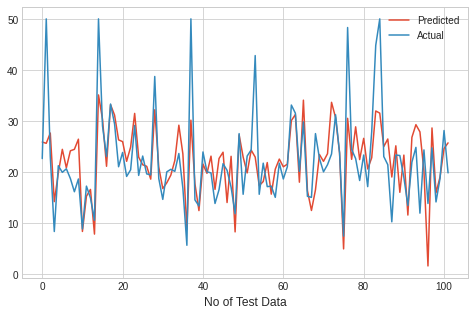

In [77]:
#Plot the figure
plt.figure(figsize=(8,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

**Conclusion**

**Implementation of linear regression on Boston Housing Dataset with data pre-processing steps, finally train and test r2 score is  as 72% and 50%.**

**------------------------------------------------------------------------
---------------------------------------------------------------------------** 


Here in this case if the model is underfit than we not going to use the L1 and L2 regularization method because this methods are used for the overfillting methods. 

In [ ]:
#Following r2 score for train and test is calculated removing outliers from dataset using IQR method.

In [107]:
data=boston_df.copy()

In [108]:
#here appling min max scaling on dataframe.
#applying min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','LSTAT','PTRATIO','B']] = scaler.fit_transform(data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','LSTAT','PTRATIO','B']])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [109]:
# Load the dataset into Pandas Dataframe
data= pd.DataFrame(boston_dataset.data)
data.columns = boston_dataset.feature_names
data_target = np.asarray(boston_dataset.target)
data['House_Price'] = pd.Series(boston_pd_target)

# input
X =data.iloc[:, :-1]

#output
Y = data.iloc[:, -1]

print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House_Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [110]:
#for removing outlier we are using following method and that is represented as follow
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


CRIM             3.595038
ZN              12.500000
INDUS           12.910000
CHAS             0.000000
NOX              0.175000
RM               0.738000
AGE             49.050000
DIS              3.088250
RAD             20.000000
TAX            387.000000
PTRATIO          2.800000
B               20.847500
LSTAT           10.005000
House_Price      7.975000
dtype: float64


In [111]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(268, 14)

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

      vif=pd.DataFrame()
      vif["variables"]=X.columns
      vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

      return (vif)
calc_vif(data[[i for i in data.describe().columns if i not in ['House_Price']]])

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,CRIM,8.818406
1,ZN,2.027880
2,INDUS,10.019997
3,CHAS,NaN
4,NOX,103.970273
5,RM,309.172626
6,AGE,16.742082
7,DIS,19.226934
8,RAD,19.506998
9,TAX,41.628523


In [113]:
df10=data.copy()

In [114]:
df10.drop(["B"],axis=1,inplace=True)

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

      vif=pd.DataFrame()
      vif["variables"]=X.columns
      vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

      return (vif)
calc_vif(df10[[i for i in df10.describe().columns if i not in ['House_Price']]])

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,CRIM,8.734370
1,ZN,2.026699
2,INDUS,9.780976
3,CHAS,NaN
4,NOX,88.731042
5,RM,155.105643
6,AGE,16.096273
7,DIS,18.502012
8,RAD,19.313785
9,TAX,41.352247


In [116]:
df10.drop(["PTRATIO"],axis=1,inplace=True)

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

      vif=pd.DataFrame()
      vif["variables"]=X.columns
      vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

      return (vif)
calc_vif(df10[[i for i in df10.describe().columns if i not in ['House_Price']]])

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,CRIM,8.589733
1,ZN,1.929156
2,INDUS,9.664101
3,CHAS,NaN
4,NOX,88.693059
5,RM,94.572501
6,AGE,16.080712
7,DIS,18.019138
8,RAD,19.209464
9,TAX,40.771720


In [118]:
df11=df10.copy()

In [119]:
df11.drop(["NOX","TAX"],axis=1,inplace=True)

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

      vif=pd.DataFrame()
      vif["variables"]=X.columns
      vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

      return (vif)
calc_vif(df11[[i for i in df11.describe().columns if i not in ['House_Price']]])

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,CRIM,8.085172
1,ZN,1.902584
2,INDUS,7.923593
3,CHAS,NaN
4,RM,37.806845
5,AGE,15.758689
6,DIS,17.174739
7,RAD,11.892893
8,LSTAT,10.343334


In [121]:
df11.drop(["AGE"],axis=1,inplace=True)

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

      vif=pd.DataFrame()
      vif["variables"]=X.columns
      vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

      return (vif)
calc_vif(df11[[i for i in df11.describe().columns if i not in ['House_Price']]])

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,CRIM,8.041087
1,ZN,1.891783
2,INDUS,7.911321
3,CHAS,NaN
4,RM,23.006983
5,DIS,13.844142
6,RAD,11.856254
7,LSTAT,7.215420


In [123]:
df12=df11.copy()

In [124]:
df12.drop(["DIS"],axis=1,inplace=True)

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

      vif=pd.DataFrame()
      vif["variables"]=X.columns
      vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

      return (vif)
calc_vif(df12[[i for i in df12.describe().columns if i not in ['House_Price']]])

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,CRIM,7.780303
1,ZN,1.398512
2,INDUS,6.345886
3,CHAS,NaN
4,RM,8.932010
5,RAD,11.623612
6,LSTAT,7.090008


In [134]:
#Train-Test split and training of model with training data.
X = df12.drop(["House_Price"],axis=1)
y = df12.House_Price
     

# Splitting the data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_train1= regr.predict(X_train1)
y_pred_train1



array([22.14189589, 25.04624379, 21.54912193, 22.37263518, 18.70106305,
       20.02095431, 21.36217908, 22.07273793, 23.28017322, 19.79888663,
       24.66272513, 18.99088841, 24.97839183, 16.90589871, 24.46619736,
       20.03402393, 24.46622814, 24.98432483, 18.42079763, 23.9935466 ,
       24.55184417, 20.19993799, 18.10525318, 14.14735714, 21.99473603,
       21.92915266, 18.16344784,  8.7068372 , 23.43976924, 19.12592895,
       15.38918076, 17.11200285, 22.23955261, 18.31340901, 27.95226475,
       19.96744802, 21.56414551, 20.99448241, 19.59013899, 28.77743535,
       21.90751338, 23.85670243, 25.91828684, 24.96309273, 21.41189455,
       23.68227944, 18.40543747, 20.87313961, 19.99179216, 19.27602309,
       19.21822316, 22.00190975, 24.67981556, 24.60928371, 28.93060501,
       10.47776925, 19.29874262, 22.06172516, 20.24987334, 12.05669067,
       23.51691977, 21.53999094, 21.2029962 , 28.38044159, 21.8918128 ,
       15.9430784 , 23.30736879, 21.20738809, 21.77147   , 17.90

In [135]:
MSE_train1 = mean_squared_error(y_train1, y_pred_train1)
print(f'MSE= {MSE_train1}')

RMSE_train1 = np.sqrt(MSE_train1)
print(f'RMSE= {RMSE_train}')

R2_Score_train1 = r2_score(y_train1, y_pred_train1)
print(f'R2_Score= {R2_Score_train1}')

MSE= 8.999069394060417
RMSE= 2.999844895000476
R2_Score= 0.5869010772628007


In [138]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_test1= regr.predict(X_test1)
y_pred_test1


array([18.49131986, 21.05701993, 28.19658614, 22.49780808, 26.72293319,
       29.7672784 , 17.53160868, 23.45769852, 21.44650271, 13.56176589,
       25.08298271, 24.05923758, 26.2234761 , 22.16693024, 21.84413188,
       22.40153315, 24.6604721 , 20.79224404, 23.21947337, 27.05005595,
       20.01346825, 22.58970414, 18.69030822, 17.16755282, 17.39759651,
       22.20511515,  8.96182976, 22.12524395, 25.40402252, 15.30790236,
       19.35892962, 18.22854084, 18.91847762, 22.4858047 , 22.24589041,
       22.39417814, 22.45009444, 18.65424098, 16.11387909, 12.9970192 ,
       22.33330409, 22.41106781, 21.58280643, 20.15732188, 18.80778314,
       14.75933201, 19.27938713, 21.8049085 , 21.40037969, 25.78683223,
       17.49274132, 19.05380744, 20.64731521, 19.28654785])

In [139]:
MSE_test1 = mean_squared_error(y_test1, y_pred_test1)
print(f'MSE= {MSE_test1}')

RMSE_test1 = np.sqrt(MSE_test1)
print(f'RMSE= {RMSE_test1}')

R2_Score_test1 = r2_score(y_test1, y_pred_test1)
print(f'R2_Score= {R2_Score_test1}')

MSE= 10.25730195166677
RMSE= 3.2027022889533097
R2_Score= 0.5599206468461685


In [48]:
# X_train, X_test, y_train, y_test = train_test_split(
# 	boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
# 	test_size = 0.25)

# print("Train data shape of X = % s and Y = % s : "%(
# 	X_train.shape, y_train.shape))

# print("Test data shape of X = % s and Y = % s : "%(
# 	X_test.shape, y_test.shape))

In [49]:
# # Putting together the coefficient and their corresponding variable names
# regr_coefficient = pd.DataFrame()
# regr_coefficient["Columns"] = X_train.columns
# regr_coefficient['Coefficient Estimate'] = pd.Series(regr.coef_)
# print(regr_coefficient)


In [50]:
# # plotting the coefficient score
# fig, ax = plt.subplots(figsize =(20, 10))

# color =['tab:gray', 'tab:blue', 'tab:orange',
# 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
# 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
# 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

# ax.bar(regr_coefficient["Columns"],
# regr_coefficient['Coefficient Estimate'],
# color = color)

# ax.spines['bottom'].set_position('zero')

# plt.style.use('ggplot')
# plt.show()

# **Ridge Regression:**

In [51]:
# # import ridge regression from sklearn library
# #alpha=1
# from sklearn.linear_model import Ridge

# # Train the model
# ridgeR = Ridge(alpha = 1)
# ridgeR.fit(X_train, y_train)
# y_pred = ridgeR.predict(X_train)

# # calculate mean square error
# mean_squared_error_ridge = np.mean((y_pred-y_train)**2)
# print(mean_squared_error_ridge)

# # get ridge coefficient and print them
# ridge_coefficient = pd.DataFrame()
# ridge_coefficient["Columns"]= X_train.columns
# ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
# print(ridge_coefficient)

In [52]:
# # plotting the coefficient score
# fig, ax = plt.subplots(figsize =(20, 10))

# color =['tab:gray', 'tab:blue', 'tab:orange',
# 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
# 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
# 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

# ax.bar(ridge_coefficient["Columns"],
# ridge_coefficient['Coefficient Estimate'],
# color = color)

# ax.spines['bottom'].set_position('zero')

# plt.style.use('ggplot')
# plt.show()


In [53]:
# # import ridge regression from sklearn library
# #alpha=2
# from sklearn.linear_model import Ridge

# # Train the model
# ridgeR = Ridge(alpha = 2)
# ridgeR.fit(X_train, y_train)
# y_pred = ridgeR.predict(X_test)

# # calculate mean square error
# mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
# print(mean_squared_error_ridge)

# # get ridge coefficient and print them
# ridge_coefficient = pd.DataFrame()
# ridge_coefficient["Columns"]= X_train.columns
# ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
# print(ridge_coefficient)

In [54]:
# # plotting the coefficient score
# fig, ax = plt.subplots(figsize =(20, 10))

# color =['tab:gray', 'tab:blue', 'tab:orange',
# 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
# 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
# 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

# ax.bar(ridge_coefficient["Columns"],
# ridge_coefficient['Coefficient Estimate'],
# color = color)

# ax.spines['bottom'].set_position('zero')

# plt.style.use('ggplot')
# plt.show()


In [55]:
# # plotting the coefficient score
# fig, ax = plt.subplots(figsize =(20, 10))

# color =['tab:gray', 'tab:blue', 'tab:orange',
# 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
# 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
# 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

# ax.bar(ridge_coefficient["Columns"],
# ridge_coefficient['Coefficient Estimate'],
# color = color)

# ax.spines['bottom'].set_position('zero')

# plt.style.use('ggplot')
# plt.show()


In [56]:
# #we calculate the regression coefficient on train data.
# # import ridge regression from sklearn library
# #alpha=1
# from sklearn.linear_model import Ridge

# # Train the model
# ridgeR = Ridge(alpha = 3)
# ridgeR.fit(X_train, y_train)
# y_pred = ridgeR.predict(X_test)

# # calculate mean square error
# mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
# print(mean_squared_error_ridge)

# # get ridge coefficient and print them
# ridge_coefficient = pd.DataFrame()
# ridge_coefficient["Columns"]= X_train.columns
# ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
# print(ridge_coefficient)

In [57]:
# # plotting the coefficient score
# fig, ax = plt.subplots(figsize =(20, 10))

# color =['tab:gray', 'tab:blue', 'tab:orange',
# 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
# 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
# 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

# ax.bar(ridge_coefficient["Columns"],
# ridge_coefficient['Coefficient Estimate'],
# color = color)

# ax.spines['bottom'].set_position('zero')

# plt.style.use('ggplot')
# plt.show()


In [58]:
# # import ridge regression from sklearn library
# #alpha=4
# from sklearn.linear_model import Ridge

# # Train the model
# ridgeR = Ridge(alpha = 4)
# ridgeR.fit(X_train, y_train)
# y_pred = ridgeR.predict(X_test)

# # calculate mean square error
# mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
# print(mean_squared_error_ridge)

# # get ridge coefficient and print them
# ridge_coefficient = pd.DataFrame()
# ridge_coefficient["Columns"]= X_train.columns
# ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
# print(ridge_coefficient)

In [59]:
# # plotting the coefficient score
# fig, ax = plt.subplots(figsize =(20, 10))

# color =['tab:gray', 'tab:blue', 'tab:orange',
# 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
# 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
# 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

# ax.bar(ridge_coefficient["Columns"],
# ridge_coefficient['Coefficient Estimate'],
# color = color)

# ax.spines['bottom'].set_position('zero')

# plt.style.use('ggplot')
# plt.show()


In [60]:
# # import ridge regression from sklearn library
# #alpha=7
# from sklearn.linear_model import Ridge

# # Train the model
# ridgeR = Ridge(alpha = 7)
# ridgeR.fit(X_train, y_train)
# y_pred = ridgeR.predict(X_test)

# # calculate mean square error
# mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
# print(mean_squared_error_ridge)

# # get ridge coefficient and print them
# ridge_coefficient = pd.DataFrame()
# ridge_coefficient["Columns"]= X_train.columns
# ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
# print(ridge_coefficient)

In [61]:
# # plotting the coefficient score
# fig, ax = plt.subplots(figsize =(20, 10))

# color =['tab:gray', 'tab:blue', 'tab:orange',
# 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
# 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
# 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

# ax.bar(ridge_coefficient["Columns"],
# ridge_coefficient['Coefficient Estimate'],
# color = color)

# ax.spines['bottom'].set_position('zero')

# plt.style.use('ggplot')
# plt.show()


In [62]:
# # import ridge regression from sklearn library
# #alpha=10
# from sklearn.linear_model import Ridge

# # Train the model
# ridgeR = Ridge(alpha = 10)
# ridgeR.fit(X_train, y_train)
# y_pred = ridgeR.predict(X_test)

# # calculate mean square error
# mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
# print(mean_squared_error_ridge)

# # get ridge coefficient and print them
# ridge_coefficient = pd.DataFrame()
# ridge_coefficient["Columns"]= X_train.columns
# ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
# print(ridge_coefficient)

In [63]:
# # plotting the coefficient score
# fig, ax = plt.subplots(figsize =(20, 10))

# color =['tab:gray', 'tab:blue', 'tab:orange',
# 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
# 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
# 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

# ax.bar(ridge_coefficient["Columns"],
# ridge_coefficient['Coefficient Estimate'],
# color = color)

# ax.spines['bottom'].set_position('zero')

# plt.style.use('ggplot')
# plt.show()


# **Lasso Regression:**

In [64]:
# # import Lasso regression from sklearn library
# from sklearn.linear_model import Lasso

# # Train the model
# lasso = Lasso(alpha = 1)
# lasso.fit(X_train, y_train)
# y_pred1 = lasso.predict(X_test)

# # Calculate Mean Squared Error
# mean_squared_error = np.mean((y_pred1 - y_test)**2)
# print("Mean squared error on test set", mean_squared_error)
# lasso_coeff = pd.DataFrame()
# lasso_coeff["Columns"] = X_train.columns
# lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

# print(lasso_coeff)

# **Elastic Net**

In [65]:

# # import model
# from sklearn.linear_model import ElasticNet

# # Train the model
# e_net = ElasticNet(alpha = 1)
# e_net.fit(X_train, y_train)

# # calculate the prediction and mean square error
# y_pred_elastic = e_net.predict(X_test)
# mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
# print("Mean Squared Error on test set", mean_squared_error)

# e_net_coeff = pd.DataFrame()
# e_net_coeff["Columns"] = X_train.columns
# e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
# e_net_coeff


**Conclusion :**
From the above analysis we can reach the following conclusion about different regularization methods:

Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values.

Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables.

Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc.

Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases.